# Librerias

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
import plotly.io as pio
from ipywidgets import interactive
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Datos

In [65]:
uploaded = files.upload()
data = pd.read_csv("data_parcial.csv")

Saving data_parcial.csv to data_parcial (1).csv


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [67]:
data.describe()

variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000

In [68]:
print(data)

      variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]


In [69]:
data.head()

variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

In [70]:
data.describe()

variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000

# EDA

**Verificacion de que exista datos nulos**: Al observar como no hay datos nulos, entonces, no va a afectar en los calculos de los datos, graficas y medias, por ende se puede proceder con esto.

In [71]:
nulos = data.isnull().sum()
print(nulos)

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


**Verificacion de que exista valores/registros duplicados en el df**: Se observa que hay datos/registros duplicados por lo cual, no tiene sentido, ya que los billetes geniunos son cada uno totalmente unicos, pero falsificados si puede existir, pero esto puede generar un mayor peso y daño a los datos para el entrenamiento del perceptron y el adaline, por lo cual se concluye que se eliminara estos datos y se procedera sin ellos.

In [72]:
def veficiar_duplicados(existeDuplicados, conteo):
  if existeDuplicados:
      print("El dataset tiene registros duplicados.")
      print(f"Número de registros duplicados: {conteo}")  # Se devuelve el numero de registros duplicados
  else:
      print("El dataset no tiene registros duplicados.")

In [73]:
duplicados = data.duplicated()  # Se verifica que no haya registros(filas) duplicadas
existeDuplicados = duplicados.any() # Se verifica si hay algun duplicado (inidica que si existe al menos 1 registro duplicado)
conteo = data[duplicados].shape[0]

veficiar_duplicados(existeDuplicados, conteo)

El dataset tiene registros duplicados.
Número de registros duplicados: 24


Eliminacion de datos duplicados

In [74]:
data2 = data.drop_duplicates()

Volviendo a verificar

In [75]:
duplicados = data2.duplicated()  # Se verifica que no haya registros(filas) duplicadas
existeDuplicados = duplicados.any() # Se verifica si hay algun duplicado (inidica que si existe al menos 1 registro duplicado)
conteo = data2[duplicados].shape[0]

veficiar_duplicados(existeDuplicados, conteo)

El dataset no tiene registros duplicados.


# Graficas

Gráfico de dispersió

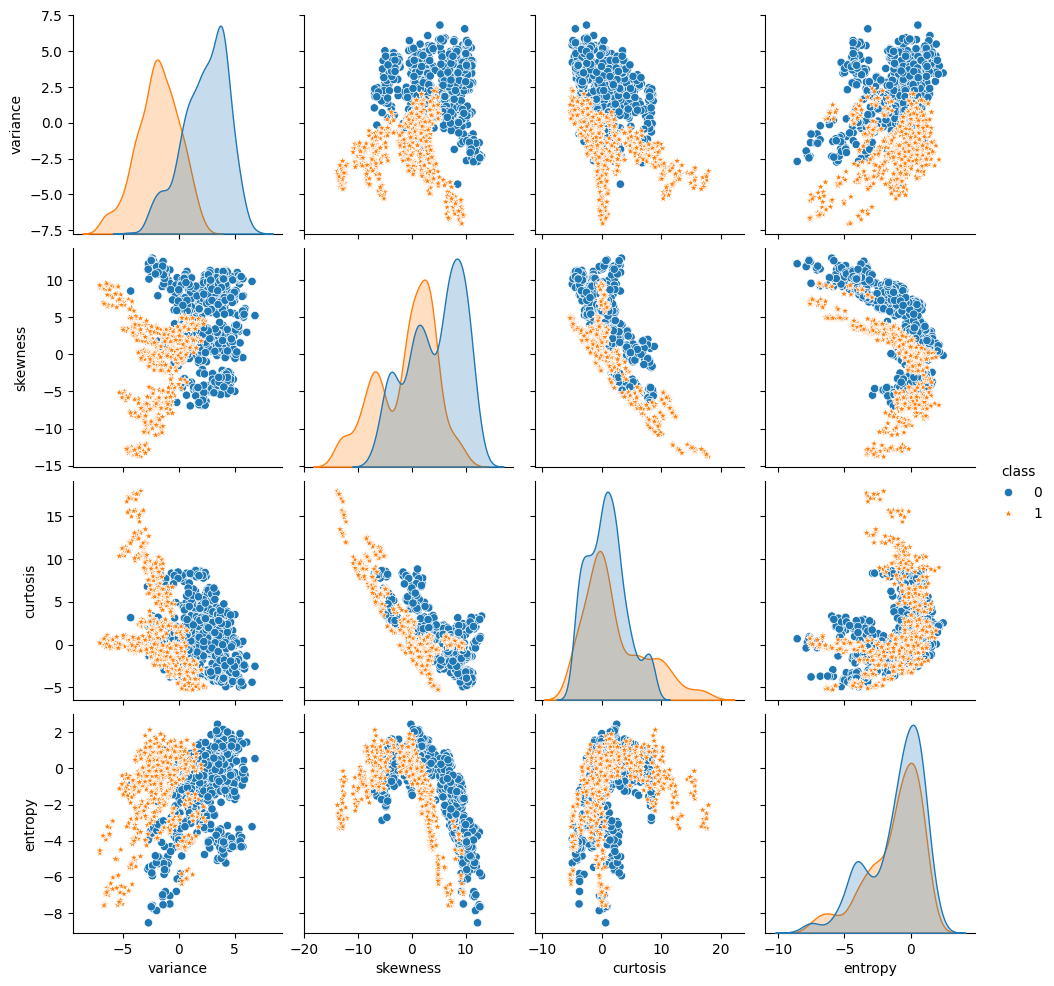

In [76]:
sns.pairplot(data2, hue = "class", markers = ["o", "*"])

Histograma de caracteristicas

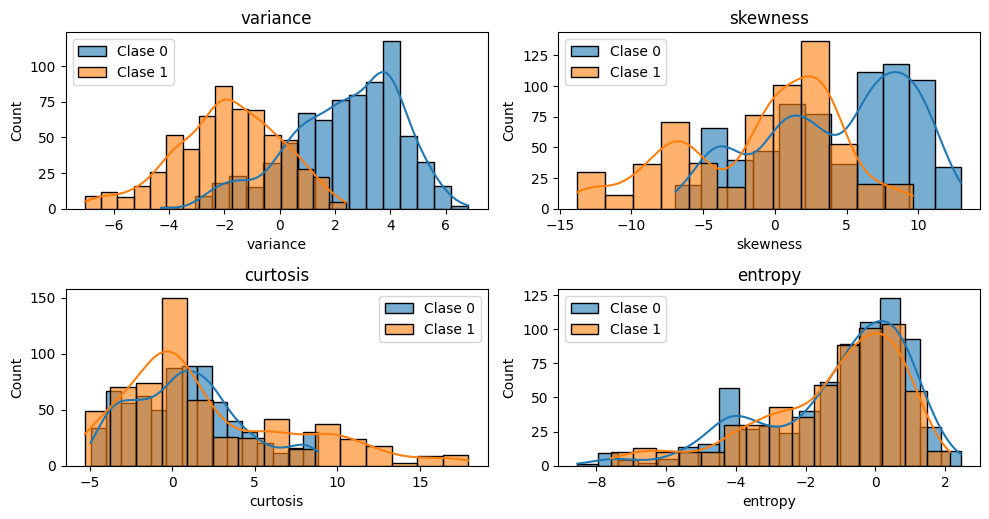

In [77]:
# Agrupar por la clase
gruposClase = data2.groupby('class')

# Obtener las características (columnas) del conjunto de datos
caracteristicas = data2.columns[:-1]  # Excluir la columna de clase (target)

# Definir el tamaño del gráfico y el número de filas y columnas
plt.figure(figsize = (10, 10))
num_filas = 4
num_columnas = 2
for i, caracteristica in enumerate(caracteristicas):  # Iterar sobre cada característica y trazar un histograma para cada clase
    plt.subplot(num_filas, num_columnas, i + 1)
    for clase, grupo in gruposClase:
        sns.histplot(grupo[caracteristica], kde=True, label=f'Clase {clase}', alpha=0.6)
    plt.title(caracteristica)
    plt.legend()

plt.tight_layout()
plt.show()

Grafica De Calor - Correlacion

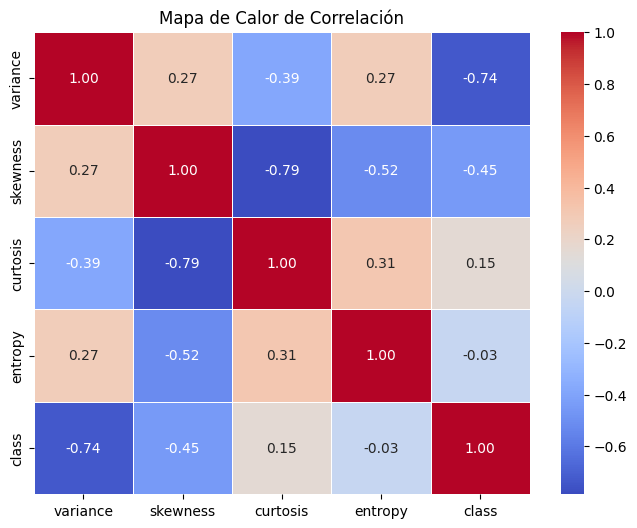

In [78]:
# Calcular la matriz de correlación
matrizCorrelacion = data2.corr()

# Mapa de calor
plt.figure(figsize = (8, 6))
sns.heatmap(matrizCorrelacion, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()

Grafica Boxenplot


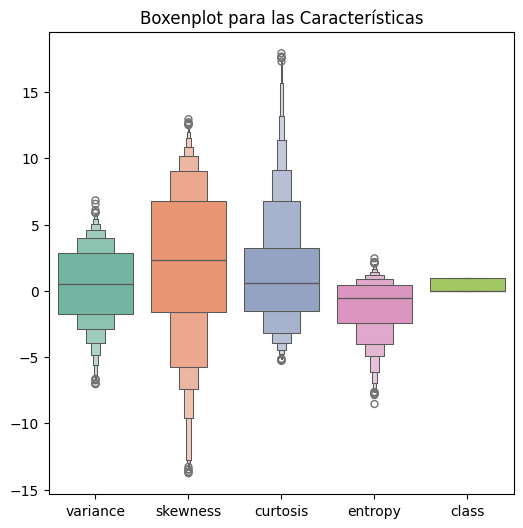

In [79]:

# Boxenplot para cada característica
plt.figure(figsize = (6, 6))
sns.boxenplot(data = data2, palette = "Set2")
plt.title("Boxenplot para las Características")
plt.show()

# 2 Caracteristicas

## Estandarización

In [80]:
features = data2[['variance', 'skewness']]
y = data2['class']

# Estandarización
scaler = StandardScaler()
X_std = scaler.fit_transform(features)


print(X_std)
print(y)

[[ 1.10970929  1.15181957]
 [ 1.43268284  1.06681036]
 [ 1.19510876 -0.77514686]
 ...
 [-1.46621705 -2.61959283]
 [-1.40101434 -1.75434664]
 [-1.04397185 -0.43758852]]
0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1348, dtype: int64


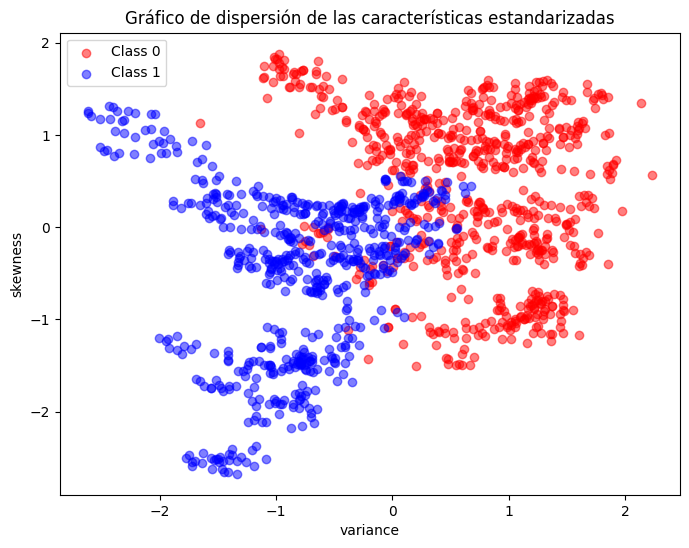

In [81]:
import matplotlib.pyplot as plt

# Supongamos que 'X_std' es tu matriz de características estandarizadas y 'target' es tu vector de objetivos
plt.figure(figsize=(8, 6))
plt.scatter(X_std[y==0, 0], X_std[y==0, 1], color='red', alpha=0.5,label='Class 0')
plt.scatter(X_std[y==1, 0], X_std[y==1, 1], color='blue', alpha=0.5,label='Class 1')
plt.title('Gráfico de dispersión de las características estandarizadas')
plt.xlabel('variance')
plt.ylabel('skewness')
plt.legend()
plt.show()


Se procede a realizar una extracción de los datos para la conformación de los datos de entrenamiento y testeo. En este caso particular, el 20% de 1.348 es 269,6, es decir aproximadamente 134,8 muestras para testeo por cada clase y asi mismo, aproximadamente 539,2 muestras (80%) de entrenamiento para cada clase.

In [82]:
X_std_train, X_std_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 42)

In [83]:
print('Conteo de etiquetas en y:', np.bincount(y))
print('Conteo de etiquetas en y_train:', np.bincount(y_train))
print('Conteo de etiquetas en y_test:', np.bincount(y_test))

Conteo de etiquetas en y: [738 610]
Conteo de etiquetas en y_train: [591 487]
Conteo de etiquetas en y_test: [147 123]


## Validacion de datos

In [84]:
promedio_X1 = X_std_train[:,0].mean()
desv_estand_X1 = X_std_train[:,0].std()
promedio_X2 = X_std_train[:,1].mean()
desv_estand_X2 = X_std_train[:,1].std()

print("Promedio de la característica 1 X1: " + str(promedio_X1))
print("Promedio de la característica 1 X1: " + str(desv_estand_X1))
print("Promedio de la característica 2 X2: " + str(promedio_X2))
print("Promedio de la característica 2 X2: " + str(desv_estand_X2))

Promedio de la característica 1 X1: 0.015296559327764343
Promedio de la característica 1 X1: 0.9978412722808622
Promedio de la característica 2 X2: 0.006483395466391066
Promedio de la característica 2 X2: 0.9941965148796469


## Entrenamientos

### Perceptron

Cantidad de muestras de clasificación erronea: 29
Cantidad de muestras de clasificación erronea: 53
Cantidad de muestras de clasificación erronea: 29
Cantidad de muestras de clasificación erronea: 53


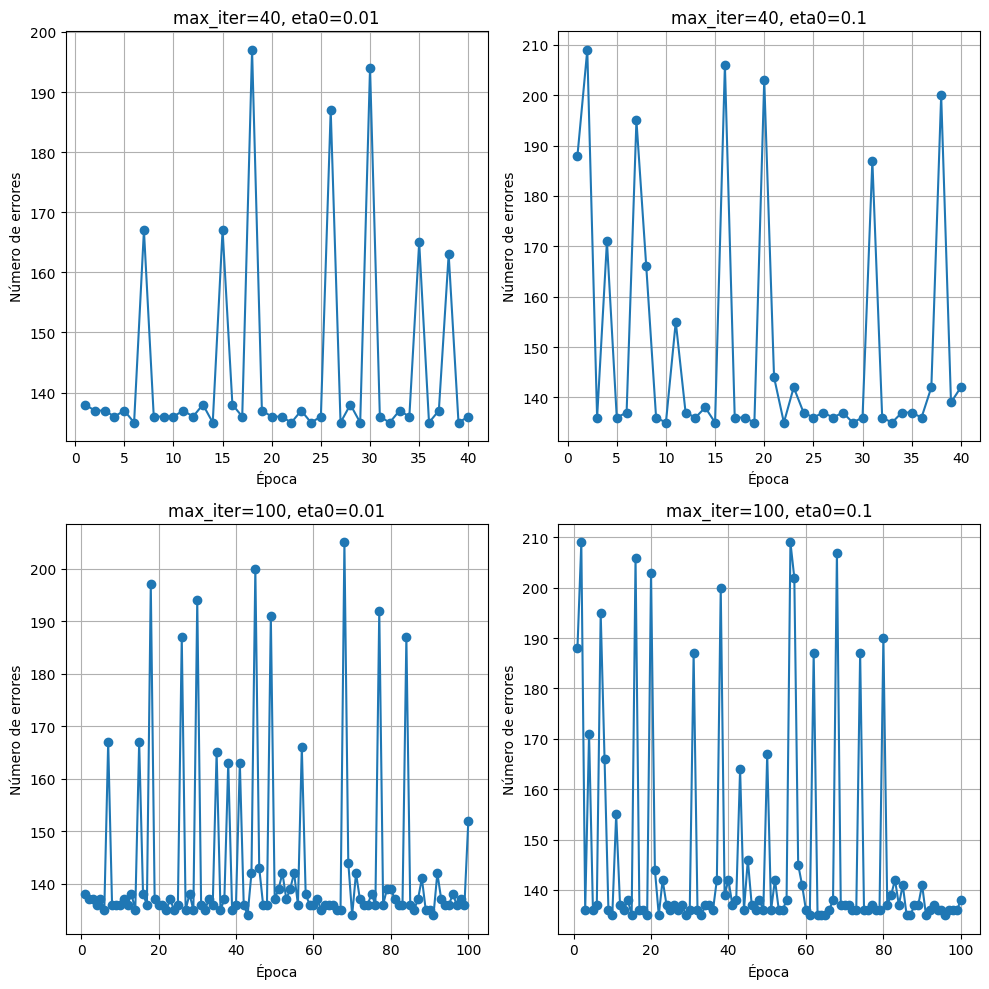

In [85]:
# Define the hyperparameter tuning space
max_iter_values = [40, 100]
eta0_values = [0.01, 0.1]

# Create a figure with subplots
fig, axs = plt.subplots(len(max_iter_values), len(eta0_values), figsize=(10, 10))
best_train = [float("inf"), 0]

# Loop through the hyperparameter tuning space
for i, max_iter in enumerate(max_iter_values):
    for j, eta0 in enumerate(eta0_values):
        # Create a Perceptron instance with the current hyperparameters
        clf_perceptron = Perceptron(max_iter=max_iter, eta0=eta0, random_state=1)

        # Train the model
        clf_perceptron.fit(X_std_train, y_train)

        # Calculate the error curve
        errores = [np.sum(y_train != clf_perceptron.predict(X_std_train))]

        y_pred = clf_perceptron.predict(X_std_test)
        errors_num = (y_test != y_pred).sum()
        print('Cantidad de muestras de clasificación erronea: %d' % errors_num )

        if errors_num < best_train[0]:
          best_train = [errors_num, clf_perceptron, y_pred]

        for k in range(1, max_iter):
            clf_perceptron.partial_fit(X_std_train, y_train)
            error = np.sum(y_train != clf_perceptron.predict(X_std_train))
            errores.append(error)

        # Plot the error curve
        axs[i, j].plot(range(1, len(errores) + 1), errores, marker='o')
        axs[i, j].set_xlabel('Época')
        axs[i, j].set_ylabel('Número de errores')
        axs[i, j].set_title(f'max_iter={max_iter}, eta0={eta0}')
        axs[i, j].grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### Adaline

Cantidad de muestras de clasificación erronea: 26
Cantidad de muestras de clasificación erronea: 29
Cantidad de muestras de clasificación erronea: 26
Cantidad de muestras de clasificación erronea: 29


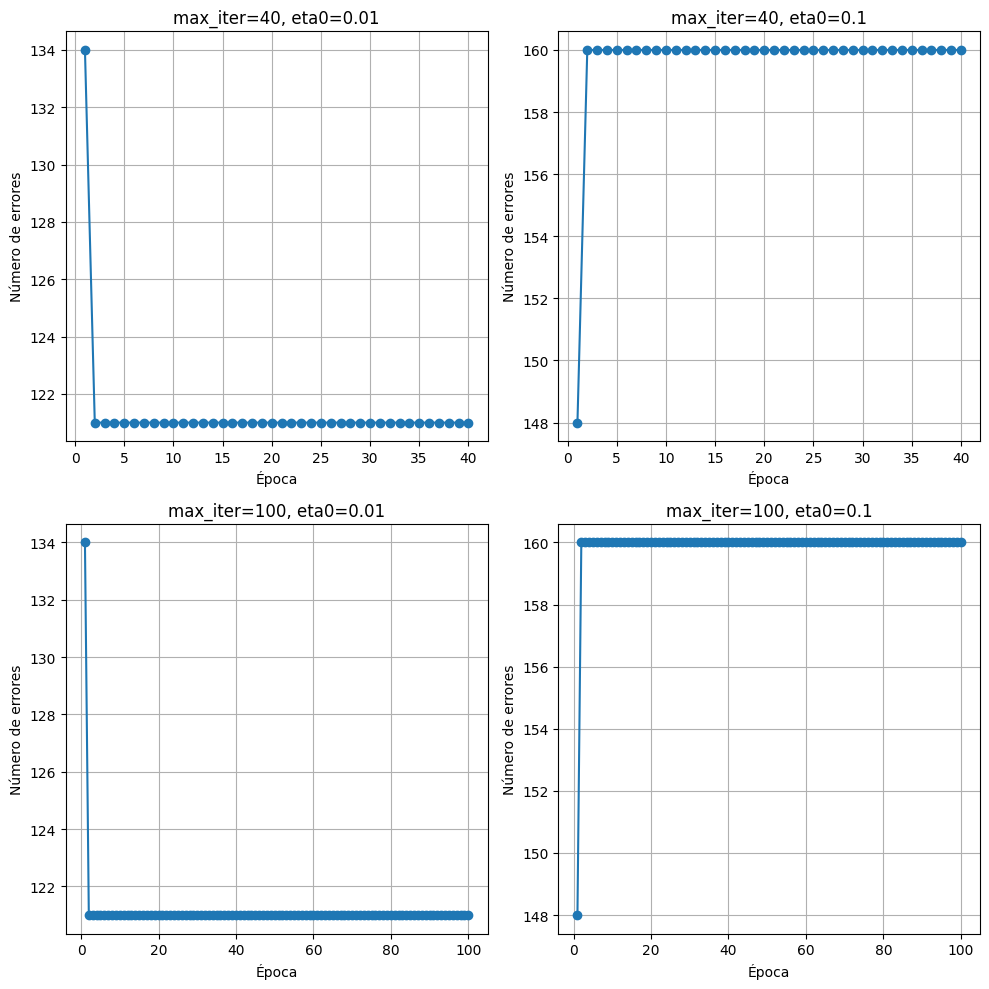

In [86]:
# Define the hyperparameter tuning space
max_iter_values = [40, 100]
eta0_values = [0.01, 0.1]

# Create a figure with subplots
fig, axs = plt.subplots(len(max_iter_values), len(eta0_values), figsize=(10, 10))
best_train2 = [float("inf"), 0]

# Loop through the hyperparameter tuning space
for i, max_iter in enumerate(max_iter_values):
    for j, eta0 in enumerate(eta0_values):
        # Create an SGDClassifier instance with the current hyperparameters
        clf_sgd = SGDClassifier(max_iter=max_iter, eta0=eta0, random_state=42, loss = 'squared_error', learning_rate = 'constant')

        # Train the model
        clf_sgd.fit(X_std_train, y_train)

        # Calculate the error curve
        errores = [np.sum(y_train!= clf_sgd.predict(X_std_train))]

        y_pred = clf_sgd.predict(X_std_test)
        errors_num = (y_test!= y_pred).sum()
        print('Cantidad de muestras de clasificación erronea: %d' % errors_num )

        if errors_num < best_train2[0]:
          best_train2 = [errors_num, clf_sgd, y_pred]

        for k in range(1, max_iter):
            clf_sgd.partial_fit(X_std_train, y_train)
            error = np.sum(y_train!= clf_sgd.predict(X_std_train))
            errores.append(error)

        # Plot the error curve
        axs[i, j].plot(range(1, len(errores) + 1), errores, marker='o')
        axs[i, j].set_xlabel('Época')
        axs[i, j].set_ylabel('Número de errores')
        axs[i, j].set_title(f'max_iter={max_iter}, eta0={eta0}')
        axs[i, j].grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### Logistic Regression

Cantidad de muestras de clasificación erronea: 28
Cantidad de muestras de clasificación erronea: 28
Cantidad de muestras de clasificación erronea: 28
Cantidad de muestras de clasificación erronea: 28
Cantidad de muestras de clasificación erronea: 28
Cantidad de muestras de clasificación erronea: 28


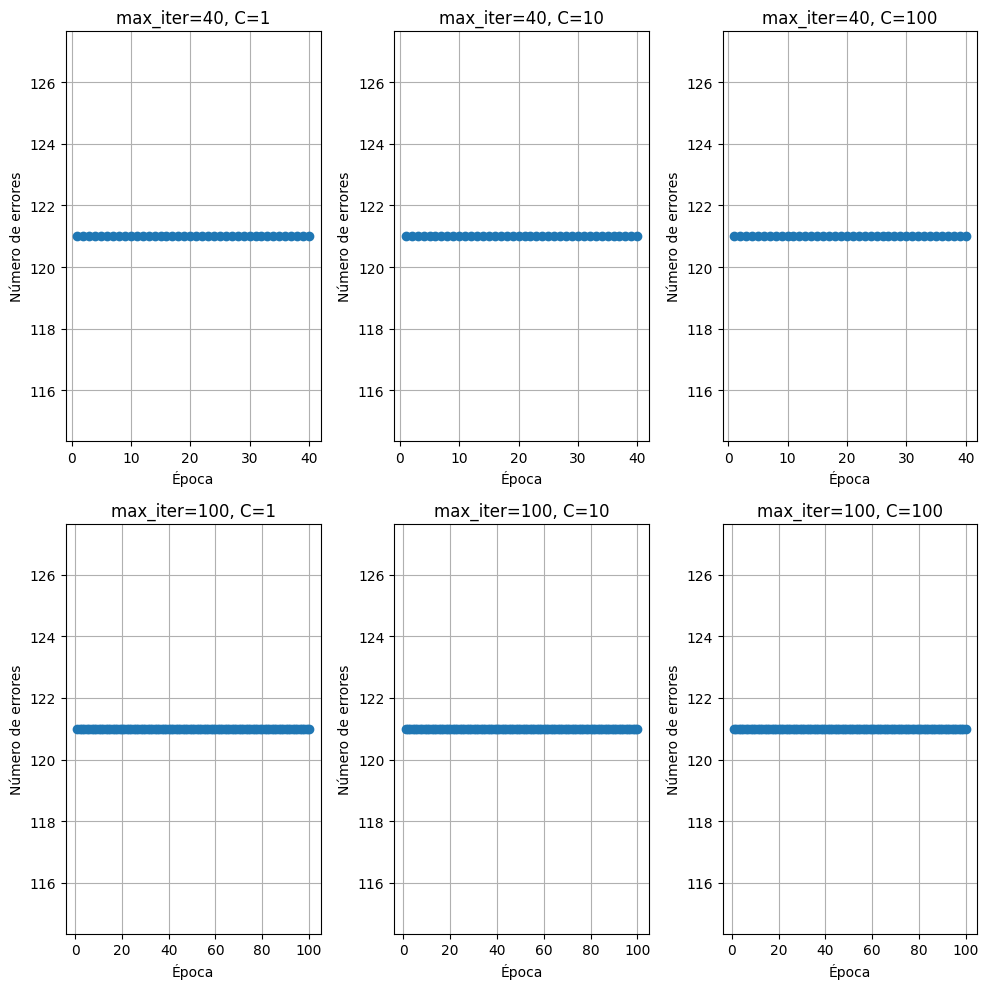

In [87]:
# Define the hyperparameter tuning space
max_iter_values = [40, 100]
C_values = [1, 10, 100]

# Create a figure with subplots
fig, axs = plt.subplots(len(max_iter_values), len(C_values), figsize=(10, 10))
best_train3 = [float("inf"), 0]

# Loop through the hyperparameter tuning space
for i, max_iter in enumerate(max_iter_values):
    for j, C in enumerate(C_values):
        # Create a LogisticRegression instance with the current hyperparameters
        clf_logistic = LogisticRegression(max_iter=max_iter, C=C, random_state=1)

        # Train the model
        clf_logistic.fit(X_std_train, y_train)

        # Calculate the error curve
        errores = [np.sum(y_train!= clf_logistic.predict(X_std_train))]

        y_pred = clf_logistic.predict(X_std_test)
        errors_num = (y_test!= y_pred).sum()
        print('Cantidad de muestras de clasificación erronea: %d' % errors_num )

        if errors_num < best_train3[0]:
          best_train3 = [errors_num, clf_logistic, y_pred]

        for k in range(1, max_iter):
            clf_logistic.fit(X_std_train, y_train)
            error = np.sum(y_train!= clf_logistic.predict(X_std_train))
            errores.append(error)

        # Plot the error curve
        axs[i, j].plot(range(1, len(errores) + 1), errores, marker='o')
        axs[i, j].set_xlabel('Época')
        axs[i, j].set_ylabel('Número de errores')
        axs[i, j].set_title(f'max_iter={max_iter}, C={C}')
        axs[i, j].grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### SVC

Cantidad de muestras de clasificación erronea: 25
Cantidad de muestras de clasificación erronea: 25
Cantidad de muestras de clasificación erronea: 25


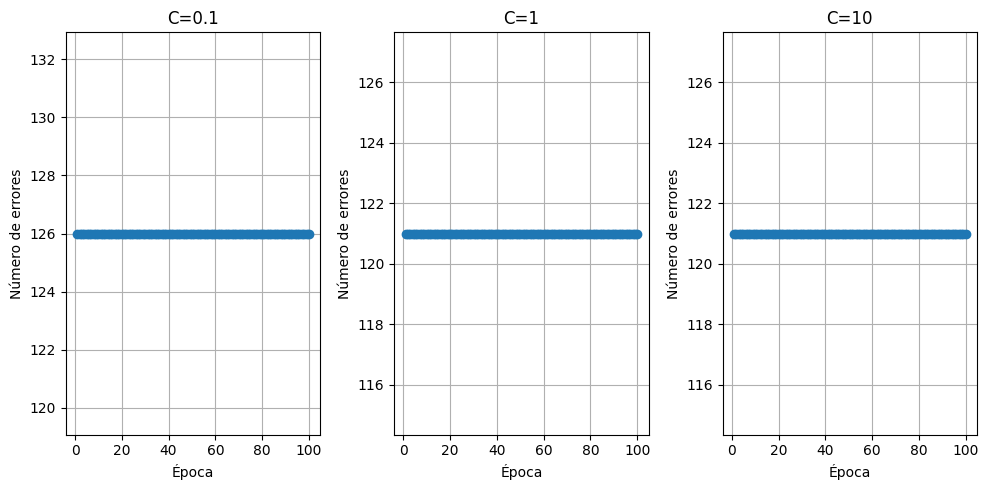

In [88]:
# Define the hyperparameter tuning space
C_values = [0.1, 1, 10]

# Create a figure with subplots
fig, axs = plt.subplots(1, len(C_values), figsize=(10, 5))
best_train4 = [float("inf"), 0]

# Loop through the hyperparameter tuning space
for i, C in enumerate(C_values):
    # Create a SVC instance with the current hyperparameters
    clf_svc = SVC(kernel='linear', C=C, random_state=42)

    # Train the model
    clf_svc.fit(X_std_train, y_train)

    # Calculate the error curve
    errores = [np.sum(y_train!= clf_svc.predict(X_std_train))]

    y_pred = clf_svc.predict(X_std_test)
    errors_num = (y_test!= y_pred).sum()
    print('Cantidad de muestras de clasificación erronea: %d' % errors_num )

    if errors_num < best_train4[0]:
      best_train4 = [errors_num, clf_svc, y_pred]

    for k in range(1, 100):
        clf_svc.fit(X_std_train, y_train)
        error = np.sum(y_train!= clf_svc.predict(X_std_train))
        errores.append(error)

    # Plot the error curve
    axs[i].plot(range(1, len(errores) + 1), errores, marker='o')
    axs[i].set_xlabel('Época')
    axs[i].set_ylabel('Número de errores')
    axs[i].set_title(f'C={C}')
    axs[i].grid(True)

# Show the plot
plt.tight_layout()
plt.show()

## Rectas de separacion

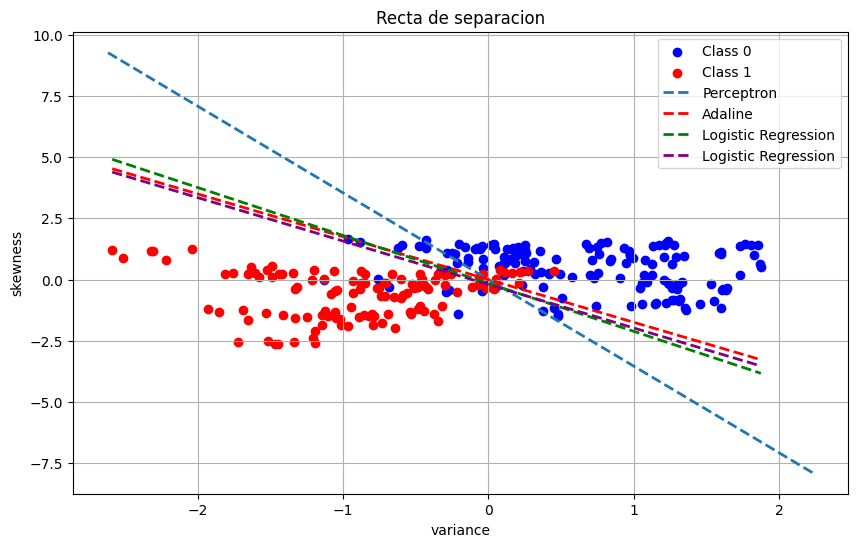

In [89]:
# Plot the decision boundary with the best training model
x_train_std_clase0 = X_std_test[y_test == 0]
x_train_std_clase1 = X_std_test[y_test == 1]

plt.figure(figsize=(10, 6))
plt.scatter(x_train_std_clase0[:, 0], x_train_std_clase0[:, 1], color='blue', label='Class 0')
plt.scatter(x_train_std_clase1[:, 0], x_train_std_clase1[:, 1], color='red', label='Class 1')

# Perceptron

# Get the coefficients and intercept of the best training model
a = -best_train[1].coef_[0][0] / best_train[1].coef_[0][1]
b = -best_train[1].intercept_[0] / best_train[1].coef_[0][1]

# Generate x values
x_values = np.linspace(X_std_train[:, 0].min(), X_std_train[:, 0].max(), 100)

# Calculate y values
y_values = a * x_values + b



# Adaline

# Get the coefficients and intercept of the best training model
a2 = -best_train2[1].coef_[0][0] / best_train2[1].coef_[0][1]
b2 = -best_train2[1].intercept_[0] / best_train2[1].coef_[0][1]

# Generate x values
x_values2 = np.linspace(X_std_test[:, 0].min(), X_std_test[:, 0].max(), 100)

# Calculate y values
y_values2 = a2 * x_values2 + b



# Logistic Regression

# Get the coefficients and intercept of the best training model
a3 = -best_train3[1].coef_[0][0] / best_train3[1].coef_[0][1]
b3 = -best_train3[1].intercept_[0] / best_train3[1].coef_[0][1]

# Generate x values
x_values3 = np.linspace(X_std_test[:, 0].min(), X_std_test[:, 0].max(), 100)

# Calculate y values
y_values3 = a3 * x_values3 + b3


# SVC

# Get the coefficients and intercept of the best training model
a4 = - best_train4[1].coef_[0][0] / best_train4[1].coef_[0][1]
b4 = - best_train4[1].intercept_[0] / best_train4[1].coef_[0][1]

# Generate x values
x_values4 = np.linspace(X_std_test[:, 0].min(), X_std_test[:, 0].max(), 100)

# Calculate y values
y_values4 = a4 * x_values4 + b4


plt.plot(x_values, y_values, linestyle='--', linewidth=2, label='Perceptron')
plt.plot(x_values2, y_values2, linestyle='--', linewidth=2, label='Adaline', color = "red")
plt.plot(x_values3, y_values3, linestyle='--', linewidth=2, label='Logistic Regression', color = "green")
plt.plot(x_values4, y_values4, linestyle='--', linewidth=2, label='Logistic Regression', color = "purple")
plt.legend()
plt.xlabel('variance')
plt.ylabel('skewness')
plt.title('Recta de separacion')
plt.grid(True)
plt.show()

## Estadisticas

### Perceptron

In [90]:
#  Exactitud (Accuracy), Tasa de error (Error rate), Precision (Precision), Sensibilidad (Sensitivitty / True positive rate) y Especificidad
# (Especificity) del perceptron

# Exactitud (Accuracy)
y_pred = best_train[2]

exactitud = accuracy_score(y_test, y_pred)

# Tasa de error (Error rate)
tasa_error = 1 - exactitud

# Matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Precision (Precision)
precision = precision_score(y_test, y_pred)

# Sensibilidad (Sensitivity / True positive rate)
sensibilidad = recall_score(y_test, y_pred)

# Especificidad (Specificity)
especificidad = matriz_confusion[0, 0] / (matriz_confusion[0, 0] + matriz_confusion[0, 1])

# Imprimir las métricas
print("Exactitud (Accuracy): %.2f" % exactitud)
print("Tasa de error (Error rate): %.2f" % tasa_error)
print("Precision (Precision): %.2f" % precision)
print("Sensibilidad (Sensitivity / True positive rate): %.2f" % sensibilidad)
print("Especificidad (Specificity): %.2f" % especificidad)

Exactitud (Accuracy): 0.89
Tasa de error (Error rate): 0.11
Precision (Precision): 0.86
Sensibilidad (Sensitivity / True positive rate): 0.92
Especificidad (Specificity): 0.87


#### Grafica Matriz Confusion

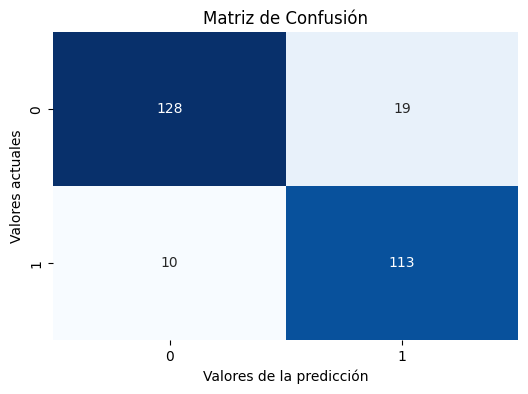

In [91]:
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion, annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

### Adaline

In [92]:
#  Exactitud (Accuracy), Tasa de error (Error rate), Precision (Precision), Sensibilidad (Sensitivitty / True positive rate) y Especificidad
# (Especificity) del perceptron

# Exactitud (Accuracy)
y_pred = best_train2[2]

exactitud = accuracy_score(y_test, y_pred)

# Tasa de error (Error rate)
tasa_error = 1 - exactitud

# Matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Precision (Precision)
precision = precision_score(y_test, y_pred)

# Sensibilidad (Sensitivity / True positive rate)
sensibilidad = recall_score(y_test, y_pred)

# Especificidad (Specificity)
especificidad = matriz_confusion[0, 0] / (matriz_confusion[0, 0] + matriz_confusion[0, 1])

# Imprimir las métricas
print("Exactitud (Accuracy): %.2f" % exactitud)
print("Tasa de error (Error rate): %.2f" % tasa_error)
print("Precision (Precision): %.2f" % precision)
print("Sensibilidad (Sensitivity / True positive rate): %.2f" % sensibilidad)
print("Especificidad (Specificity): %.2f" % especificidad)

Exactitud (Accuracy): 0.90
Tasa de error (Error rate): 0.10
Precision (Precision): 0.89
Sensibilidad (Sensitivity / True positive rate): 0.90
Especificidad (Specificity): 0.90


#### Grafica Matriz Confusion

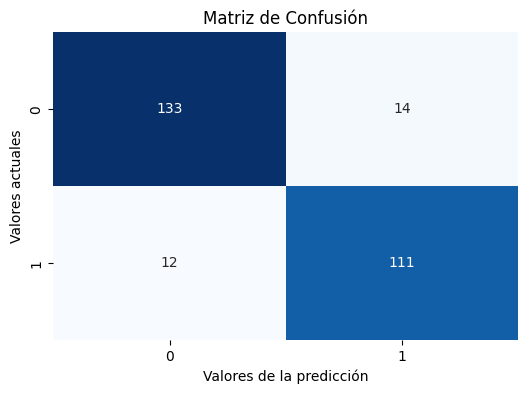

In [93]:
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion, annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

### Logistic Regression

In [94]:
#  Exactitud (Accuracy), Tasa de error (Error rate), Precision (Precision), Sensibilidad (Sensitivitty / True positive rate) y Especificidad
# (Especificity) del perceptron

# Exactitud (Accuracy)
y_pred = best_train3[2]

exactitud = accuracy_score(y_test, y_pred)

# Tasa de error (Error rate)
tasa_error = 1 - exactitud

# Matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Precision (Precision)
precision = precision_score(y_test, y_pred)

# Sensibilidad (Sensitivity / True positive rate)
sensibilidad = recall_score(y_test, y_pred)

# Especificidad (Specificity)
especificidad = matriz_confusion[0, 0] / (matriz_confusion[0, 0] + matriz_confusion[0, 1])

# Imprimir las métricas
print("Exactitud (Accuracy): %.2f" % exactitud)
print("Tasa de error (Error rate): %.2f" % tasa_error)
print("Precision (Precision): %.2f" % precision)
print("Sensibilidad (Sensitivity / True positive rate): %.2f" % sensibilidad)
print("Especificidad (Specificity): %.2f" % especificidad)

Exactitud (Accuracy): 0.90
Tasa de error (Error rate): 0.10
Precision (Precision): 0.87
Sensibilidad (Sensitivity / True positive rate): 0.91
Especificidad (Specificity): 0.88


#### Grafica Matriz Confusion

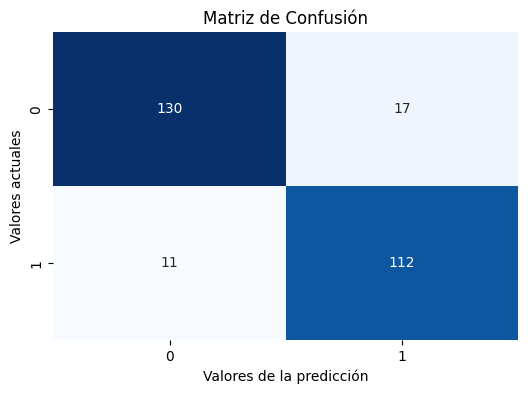

In [95]:
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion, annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

### SVC

In [96]:
#  Exactitud (Accuracy), Tasa de error (Error rate), Precision (Precision), Sensibilidad (Sensitivitty / True positive rate) y Especificidad
# (Especificity) del perceptron

# Exactitud (Accuracy)
y_pred = best_train4[2]

exactitud = accuracy_score(y_test, y_pred)

# Tasa de error (Error rate)
tasa_error = 1 - exactitud

# Matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Precision (Precision)
precision = precision_score(y_test, y_pred)

# Sensibilidad (Sensitivity / True positive rate)
sensibilidad = recall_score(y_test, y_pred)

# Especificidad (Specificity)
especificidad = matriz_confusion[0, 0] / (matriz_confusion[0, 0] + matriz_confusion[0, 1])

# Imprimir las métricas
print("Exactitud (Accuracy): %.2f" % exactitud)
print("Tasa de error (Error rate): %.2f" % tasa_error)
print("Precision (Precision): %.2f" % precision)
print("Sensibilidad (Sensitivity / True positive rate): %.2f" % sensibilidad)
print("Especificidad (Specificity): %.2f" % especificidad)

Exactitud (Accuracy): 0.91
Tasa de error (Error rate): 0.09
Precision (Precision): 0.89
Sensibilidad (Sensitivity / True positive rate): 0.91
Especificidad (Specificity): 0.90


#### Grafica Matriz Confusion

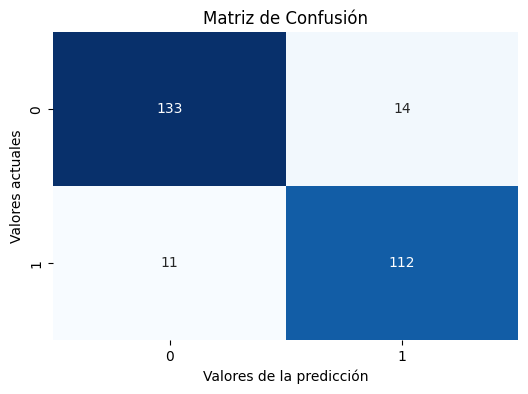

In [97]:
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion, annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

# 3 Caracteristicas

## Estandarización

In [98]:
features = data2[['variance', 'skewness', 'curtosis']]
y = data2['class']

# Estandarización
scaler = StandardScaler()
X_std = scaler.fit_transform(features)


print(X_std)
print(y)

[[ 1.10970929  1.15181957 -0.97552874]
 [ 1.43268284  1.06681036 -0.89493724]
 [ 1.19510876 -0.77514686  0.11801497]
 ...
 [-1.46621705 -2.61959283  3.73943238]
 [-1.40101434 -1.75434664  2.53756278]
 [-1.04397185 -0.43758852  0.29366608]]
0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1348, dtype: int64


In [99]:
import matplotlib.pyplot as plt

# Supongamos que 'X_std' es tu matriz de características estandarizadas y 'target' es tu vector de objetivos
# Crear trazos de dispersión para cada clase
trace0 = go.Scatter3d(
    x=X_std[y==0, 0],
    y=X_std[y==0, 1],
    z=X_std[y==0, 2],
    mode='markers',
    name='Clase 0',
    marker=dict(
        size=4,
        color='blue',
        opacity=0.8
    )
)

trace1 = go.Scatter3d(
    x=X_std[y==1, 0],
    y=X_std[y==1, 1],
    z=X_std[y==1, 2],
    mode='markers',
    name='Clase 1',
    marker=dict(
        size=4,
        color='red',
        opacity=0.8
    )
)

# Crear el layout
layout = go.Layout(
    title='Gráfico Tridimensional: variance, skewness y curtosis por Clase',
    scene=dict(
        xaxis=dict(title='Variance'),
        yaxis=dict(title='Skewness'),
        zaxis=dict(title='Curtosis')
    )
)

# Crear la figura
fig = go.Figure(data=[trace0, trace1], layout=layout)

# Visualizar la figura interactiva
pio.show(fig)

Se procede a realizar una extracción de los datos para la conformación de los datos de entrenamiento y testeo. En este caso particular, el 20% de 1.348 es 269,6, es decir aproximadamente 134,8 muestras para testeo por cada clase y asi mismo, aproximadamente 539,2 muestras (80%) de entrenamiento para cada clase.

In [100]:
X_std_train, X_std_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 42)

In [101]:
print('Conteo de etiquetas en y:', np.bincount(y))
print('Conteo de etiquetas en y_train:', np.bincount(y_train))
print('Conteo de etiquetas en y_test:', np.bincount(y_test))

Conteo de etiquetas en y: [738 610]
Conteo de etiquetas en y_train: [591 487]
Conteo de etiquetas en y_test: [147 123]


## Validacion de datos

In [102]:
promedio_X1 = X_std_train[:,0].mean()
desv_estand_X1 = X_std_train[:,0].std()
promedio_X2 = X_std_train[:,1].mean()
desv_estand_X2 = X_std_train[:,1].std()

print("Promedio de la característica 1 X1: " + str(promedio_X1))
print("Promedio de la característica 1 X1: " + str(desv_estand_X1))
print("Promedio de la característica 2 X2: " + str(promedio_X2))
print("Promedio de la característica 2 X2: " + str(desv_estand_X2))

Promedio de la característica 1 X1: 0.015296559327764343
Promedio de la característica 1 X1: 0.9978412722808622
Promedio de la característica 2 X2: 0.006483395466391066
Promedio de la característica 2 X2: 0.9941965148796469


## Entrenamientos

### Perceptron

Cantidad de muestras de clasificación erronea: 2
Cantidad de muestras de clasificación erronea: 3
Cantidad de muestras de clasificación erronea: 2
Cantidad de muestras de clasificación erronea: 3


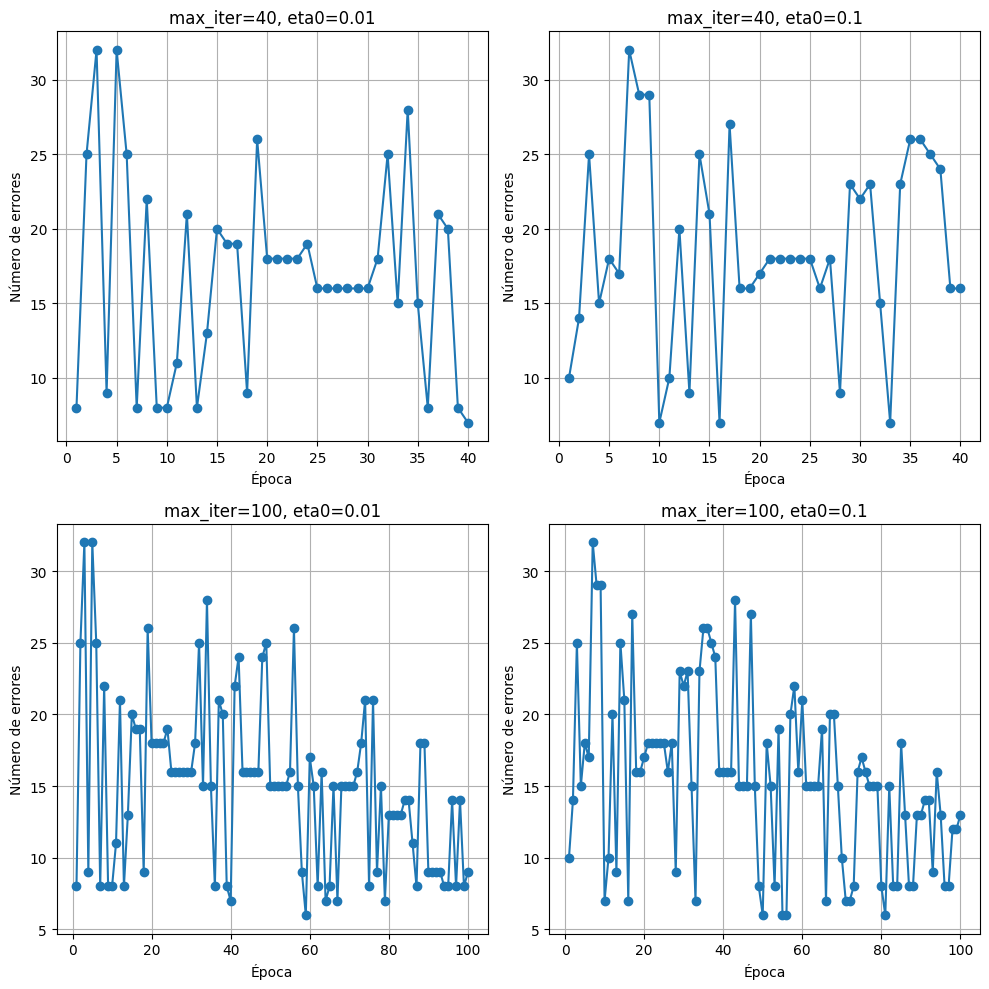

In [103]:
# Define the hyperparameter tuning space
max_iter_values = [40, 100]
eta0_values = [0.01, 0.1]

# Create a figure with subplots
fig, axs = plt.subplots(len(max_iter_values), len(eta0_values), figsize=(10, 10))
best_train = [float("inf"), 0]

# Loop through the hyperparameter tuning space
for i, max_iter in enumerate(max_iter_values):
    for j, eta0 in enumerate(eta0_values):
        # Create a Perceptron instance with the current hyperparameters
        clf_perceptron = Perceptron(max_iter=max_iter, eta0=eta0, random_state=1)

        # Train the model
        clf_perceptron.fit(X_std_train, y_train)

        # Calculate the error curve
        errores = [np.sum(y_train != clf_perceptron.predict(X_std_train))]

        y_pred = clf_perceptron.predict(X_std_test)
        errors_num = (y_test != y_pred).sum()
        print('Cantidad de muestras de clasificación erronea: %d' % errors_num )

        if errors_num < best_train[0]:
          best_train = [errors_num, clf_perceptron, y_pred]

        for k in range(1, max_iter):
            clf_perceptron.partial_fit(X_std_train, y_train)
            error = np.sum(y_train != clf_perceptron.predict(X_std_train))
            errores.append(error)

        # Plot the error curve
        axs[i, j].plot(range(1, len(errores) + 1), errores, marker='o')
        axs[i, j].set_xlabel('Época')
        axs[i, j].set_ylabel('Número de errores')
        axs[i, j].set_title(f'max_iter={max_iter}, eta0={eta0}')
        axs[i, j].grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### Adaline

Cantidad de muestras de clasificación erronea: 5
Cantidad de muestras de clasificación erronea: 5
Cantidad de muestras de clasificación erronea: 5
Cantidad de muestras de clasificación erronea: 5


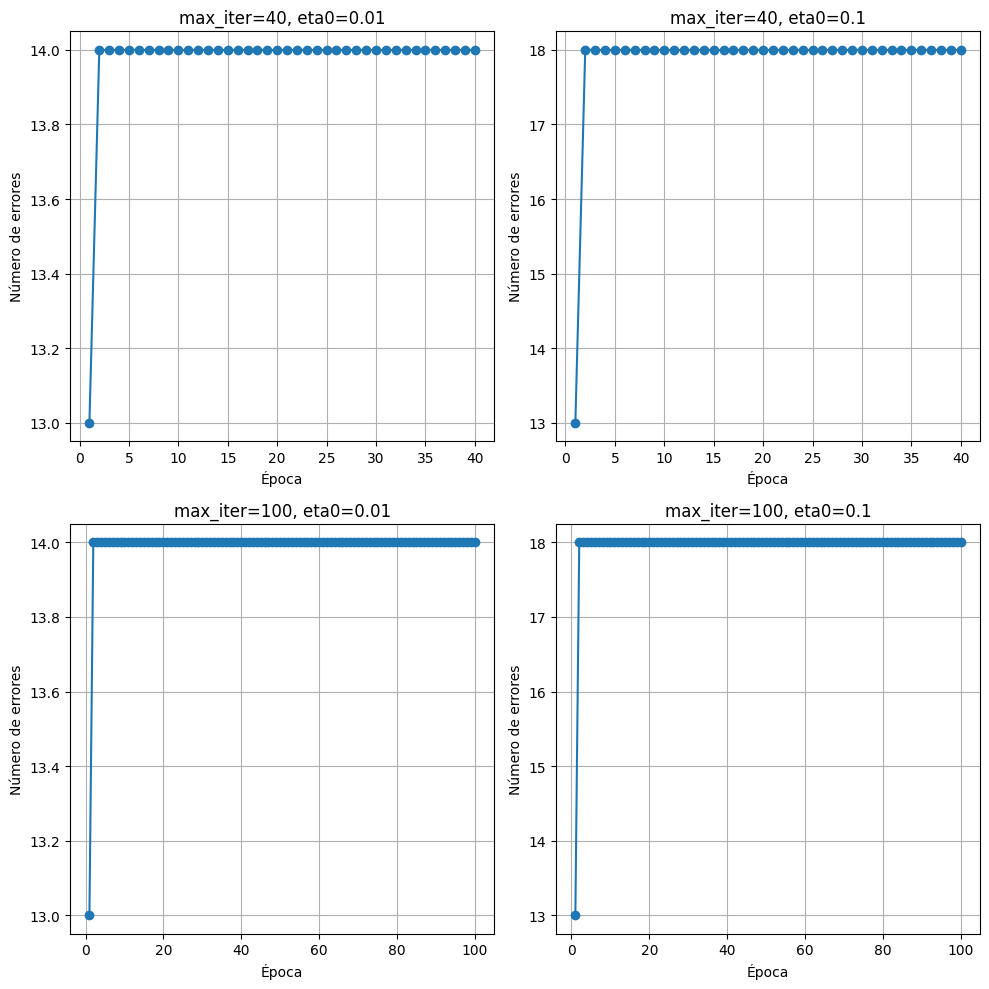

In [104]:
# Define the hyperparameter tuning space
max_iter_values = [40, 100]
eta0_values = [0.01, 0.1]

# Create a figure with subplots
fig, axs = plt.subplots(len(max_iter_values), len(eta0_values), figsize=(10, 10))
best_train2 = [float("inf"), 0]

# Loop through the hyperparameter tuning space
for i, max_iter in enumerate(max_iter_values):
    for j, eta0 in enumerate(eta0_values):
        # Create an SGDClassifier instance with the current hyperparameters
        clf_sgd = SGDClassifier(max_iter=max_iter, eta0=eta0, random_state=42, loss = 'squared_error', learning_rate = 'constant')

        # Train the model
        clf_sgd.fit(X_std_train, y_train)

        # Calculate the error curve
        errores = [np.sum(y_train!= clf_sgd.predict(X_std_train))]

        y_pred = clf_sgd.predict(X_std_test)
        errors_num = (y_test!= y_pred).sum()
        print('Cantidad de muestras de clasificación erronea: %d' % errors_num )

        if errors_num < best_train2[0]:
          best_train2 = [errors_num, clf_sgd, y_pred]

        for k in range(1, max_iter):
            clf_sgd.partial_fit(X_std_train, y_train)
            error = np.sum(y_train!= clf_sgd.predict(X_std_train))
            errores.append(error)

        # Plot the error curve
        axs[i, j].plot(range(1, len(errores) + 1), errores, marker='o')
        axs[i, j].set_xlabel('Época')
        axs[i, j].set_ylabel('Número de errores')
        axs[i, j].set_title(f'max_iter={max_iter}, eta0={eta0}')
        axs[i, j].grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### Logistic Regression

Cantidad de muestras de clasificación erronea: 3
Cantidad de muestras de clasificación erronea: 2
Cantidad de muestras de clasificación erronea: 1
Cantidad de muestras de clasificación erronea: 3
Cantidad de muestras de clasificación erronea: 2
Cantidad de muestras de clasificación erronea: 1


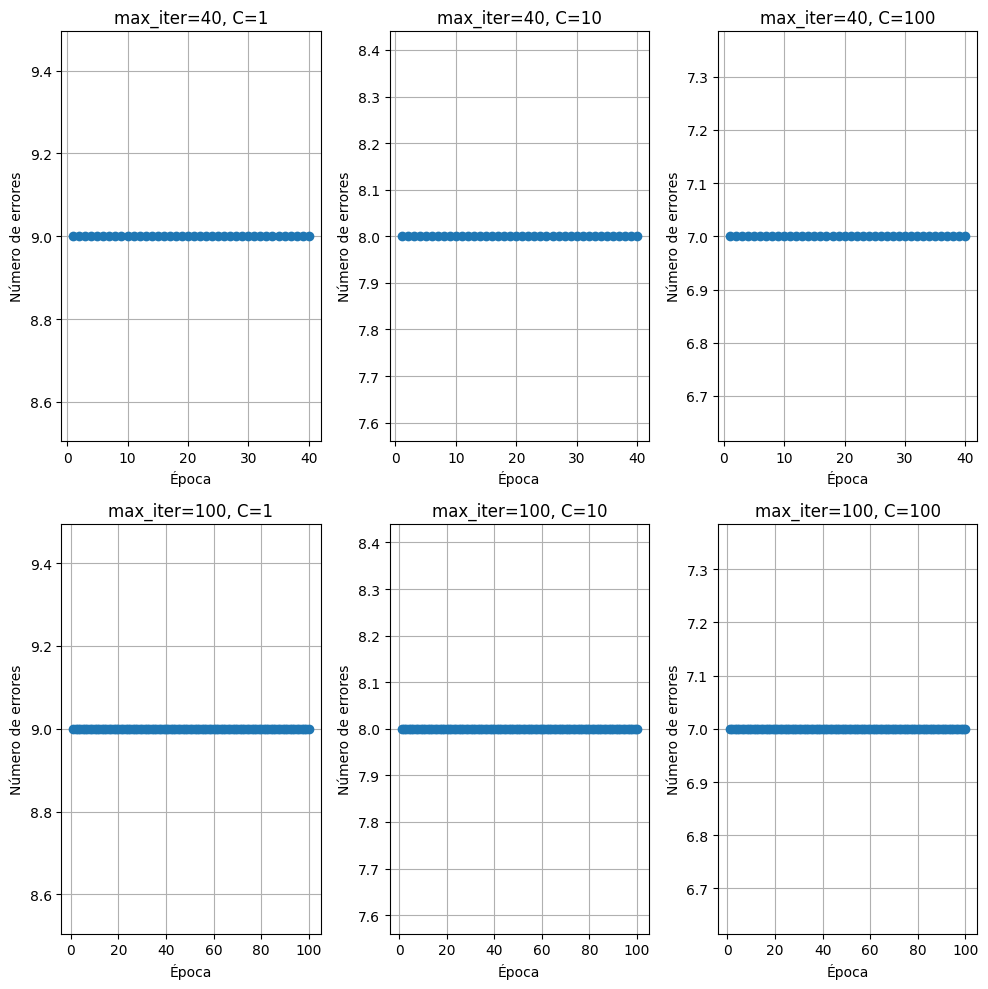

In [105]:
# Define the hyperparameter tuning space
max_iter_values = [40, 100]
C_values = [1, 10, 100]

# Create a figure with subplots
fig, axs = plt.subplots(len(max_iter_values), len(C_values), figsize=(10, 10))
best_train3 = [float("inf"), 0]

# Loop through the hyperparameter tuning space
for i, max_iter in enumerate(max_iter_values):
    for j, C in enumerate(C_values):
        # Create a LogisticRegression instance with the current hyperparameters
        clf_logistic = LogisticRegression(max_iter=max_iter, C=C, random_state=1)

        # Train the model
        clf_logistic.fit(X_std_train, y_train)

        # Calculate the error curve
        errores = [np.sum(y_train!= clf_logistic.predict(X_std_train))]

        y_pred = clf_logistic.predict(X_std_test)
        errors_num = (y_test!= y_pred).sum()
        print('Cantidad de muestras de clasificación erronea: %d' % errors_num )

        if errors_num < best_train3[0]:
          best_train3 = [errors_num, clf_logistic, y_pred]

        for k in range(1, max_iter):
            clf_logistic.fit(X_std_train, y_train)
            error = np.sum(y_train!= clf_logistic.predict(X_std_train))
            errores.append(error)

        # Plot the error curve
        axs[i, j].plot(range(1, len(errores) + 1), errores, marker='o')
        axs[i, j].set_xlabel('Época')
        axs[i, j].set_ylabel('Número de errores')
        axs[i, j].set_title(f'max_iter={max_iter}, C={C}')
        axs[i, j].grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### SVC

Cantidad de muestras de clasificación erronea: 5
Cantidad de muestras de clasificación erronea: 2
Cantidad de muestras de clasificación erronea: 2


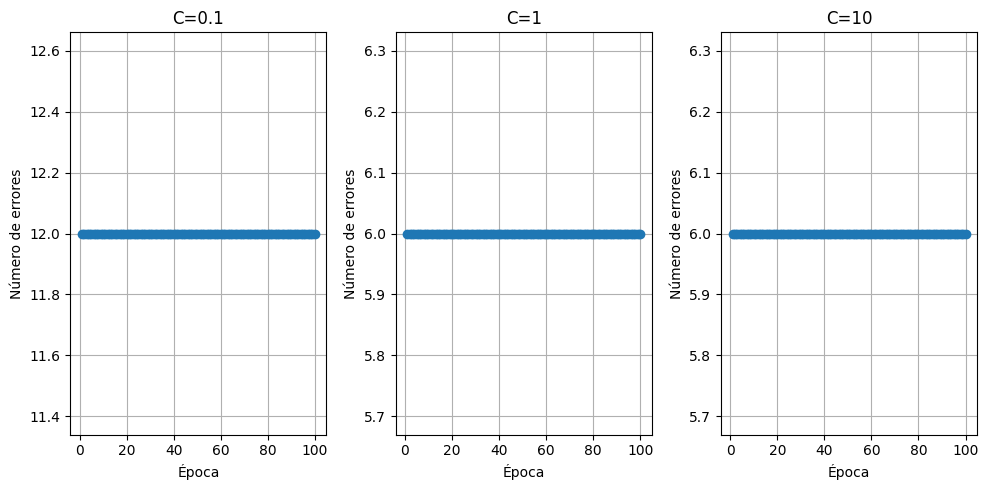

In [106]:
# Define the hyperparameter tuning space
C_values = [0.1, 1, 10]

# Create a figure with subplots
fig, axs = plt.subplots(1, len(C_values), figsize=(10, 5))
best_train4 = [float("inf"), 0]

# Loop through the hyperparameter tuning space
for i, C in enumerate(C_values):
    # Create a SVC instance with the current hyperparameters
    clf_svc = SVC(kernel='linear', C=C, random_state=42)

    # Train the model
    clf_svc.fit(X_std_train, y_train)

    # Calculate the error curve
    errores = [np.sum(y_train!= clf_svc.predict(X_std_train))]

    y_pred = clf_svc.predict(X_std_test)
    errors_num = (y_test!= y_pred).sum()
    print('Cantidad de muestras de clasificación erronea: %d' % errors_num )

    if errors_num < best_train4[0]:
      best_train4 = [errors_num, clf_svc, y_pred]

    for k in range(1, 100):
        clf_svc.fit(X_std_train, y_train)
        error = np.sum(y_train!= clf_svc.predict(X_std_train))
        errores.append(error)

    # Plot the error curve
    axs[i].plot(range(1, len(errores) + 1), errores, marker='o')
    axs[i].set_xlabel('Época')
    axs[i].set_ylabel('Número de errores')
    axs[i].set_title(f'C={C}')
    axs[i].grid(True)

# Show the plot
plt.tight_layout()
plt.show()

## Rectas de separacion

In [107]:
# Grafica rectas

# Obtener los pesos del mejor entrenamiento de cada modelo
pesos_perceptron = best_train[1].coef_[0]
pesos_adaline = best_train2[1].coef_[0]
pesos_logistic = best_train3[1].coef_[0]
pesos_svm = best_train4[1].coef_[0]

# Obtener los sesgos (bias) del mejor entrenamiento de cada modelo
sesgo_perceptron = best_train[1].intercept_[0]
sesgo_adaline = best_train2[1].intercept_[0]
sesgo_logistic = best_train3[1].intercept_[0]
sesgo_svm = best_train4[1].intercept_[0]

# Crear una gráfica de dispersión tridimensional de los datos de prueba
fig = go.Figure()

# Datos de dispersión
fig.add_trace(go.Scatter3d(
    x=X_std_test[y_test == 0][:, 0],
    y=X_std_test[y_test == 0][:, 1],
    z=X_std_test[y_test == 0][:, 2],
    mode='markers',
    marker=dict(color='blue', size=3),
    name='Billetes Reales'
))

fig.add_trace(go.Scatter3d(
    x=X_std_test[y_test == 1][:, 0],
    y=X_std_test[y_test == 1][:, 1],
    z=X_std_test[y_test == 1][:, 2],
    mode='markers',
    marker=dict(color='red', size=3),
    name='Billetes Falsos'
))

# Trazar las rectas de separación de cada modelo
x_values = np.linspace(-2, 2, 100)
y_values = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_values, y_values)

# Perceptron
Z_perceptron = (-pesos_perceptron[0] * X - pesos_perceptron[1] * Y - sesgo_perceptron) / pesos_perceptron[2]

fig.add_trace(go.Surface(z=Z_perceptron, x=X, y=Y, opacity=0.5, colorscale='Blues', name='Perceptron'))

# Adaline
Z_adaline = (-pesos_adaline[0] * X - pesos_adaline[1] * Y - sesgo_adaline) / pesos_adaline[2]

fig.add_trace(go.Surface(z=Z_adaline, x=X, y=Y, opacity=0.5, colorscale='Purples', name='Adaline'))

# Regresión Logística
Z_logistic = (-pesos_logistic[0] * X - pesos_logistic[1] * Y - sesgo_logistic) / pesos_logistic[2]

fig.add_trace(go.Surface(z=Z_logistic, x=X, y=Y, opacity=0.5, colorscale='YlOrBr', name='Regresion Logistica'))

# SVM
Z_svm = (-pesos_svm[0] * X - pesos_svm[1] * Y - sesgo_svm) / pesos_svm[2]

fig.add_trace(go.Surface(z=Z_svm, x=X, y=Y, opacity=0.5, colorscale='Greens', name='SVM'))

# Configurar la vista y el estilo
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Variance'),
        yaxis=dict(title='Skewness'),
        zaxis=dict(title='Curtosis'),
        aspectratio=dict(x=1, y=1, z=1),
        aspectmode='manual'
    ),
    legend=dict(
        title='Modelos',
        x=0.85,
        y=0.95
    ),
    title='Superficies de separación de los mejores entrenamientos de cada modelo'
)
fig.show()

## Estadisticas

### Perceptron

In [108]:
#  Exactitud (Accuracy), Tasa de error (Error rate), Precision (Precision), Sensibilidad (Sensitivitty / True positive rate) y Especificidad
# (Especificity) del perceptron

# Exactitud (Accuracy)
y_pred = best_train[2]

exactitud = accuracy_score(y_test, y_pred)

# Tasa de error (Error rate)
tasa_error = 1 - exactitud

# Matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Precision (Precision)
precision = precision_score(y_test, y_pred)

# Sensibilidad (Sensitivity / True positive rate)
sensibilidad = recall_score(y_test, y_pred)

# Especificidad (Specificity)
especificidad = matriz_confusion[0, 0] / (matriz_confusion[0, 0] + matriz_confusion[0, 1])

# Imprimir las métricas
print("Exactitud (Accuracy): %.2f" % exactitud)
print("Tasa de error (Error rate): %.2f" % tasa_error)
print("Precision (Precision): %.2f" % precision)
print("Sensibilidad (Sensitivity / True positive rate): %.2f" % sensibilidad)
print("Especificidad (Specificity): %.2f" % especificidad)

Exactitud (Accuracy): 0.99
Tasa de error (Error rate): 0.01
Precision (Precision): 0.98
Sensibilidad (Sensitivity / True positive rate): 1.00
Especificidad (Specificity): 0.99


#### Grafica Matriz Confusion

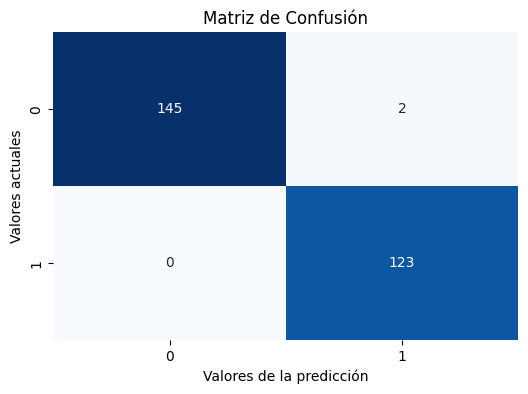

In [109]:
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion, annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

### Adaline

In [110]:
#  Exactitud (Accuracy), Tasa de error (Error rate), Precision (Precision), Sensibilidad (Sensitivitty / True positive rate) y Especificidad
# (Especificity) del perceptron

# Exactitud (Accuracy)
y_pred = best_train2[2]

exactitud = accuracy_score(y_test, y_pred)

# Tasa de error (Error rate)
tasa_error = 1 - exactitud

# Matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Precision (Precision)
precision = precision_score(y_test, y_pred)

# Sensibilidad (Sensitivity / True positive rate)
sensibilidad = recall_score(y_test, y_pred)

# Especificidad (Specificity)
especificidad = matriz_confusion[0, 0] / (matriz_confusion[0, 0] + matriz_confusion[0, 1])

# Imprimir las métricas
print("Exactitud (Accuracy): %.2f" % exactitud)
print("Tasa de error (Error rate): %.2f" % tasa_error)
print("Precision (Precision): %.2f" % precision)
print("Sensibilidad (Sensitivity / True positive rate): %.2f" % sensibilidad)
print("Especificidad (Specificity): %.2f" % especificidad)

Exactitud (Accuracy): 0.98
Tasa de error (Error rate): 0.02
Precision (Precision): 0.96
Sensibilidad (Sensitivity / True positive rate): 1.00
Especificidad (Specificity): 0.97


#### Grafica Matriz Confusion

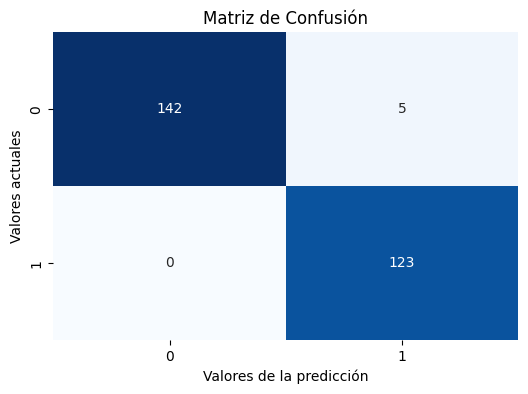

In [111]:
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion, annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

### Logistic Regression

In [112]:
#  Exactitud (Accuracy), Tasa de error (Error rate), Precision (Precision), Sensibilidad (Sensitivitty / True positive rate) y Especificidad
# (Especificity) del perceptron

# Exactitud (Accuracy)
y_pred = best_train3[2]

exactitud = accuracy_score(y_test, y_pred)

# Tasa de error (Error rate)
tasa_error = 1 - exactitud

# Matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Precision (Precision)
precision = precision_score(y_test, y_pred)

# Sensibilidad (Sensitivity / True positive rate)
sensibilidad = recall_score(y_test, y_pred)

# Especificidad (Specificity)
especificidad = matriz_confusion[0, 0] / (matriz_confusion[0, 0] + matriz_confusion[0, 1])

# Imprimir las métricas
print("Exactitud (Accuracy): %.2f" % exactitud)
print("Tasa de error (Error rate): %.2f" % tasa_error)
print("Precision (Precision): %.2f" % precision)
print("Sensibilidad (Sensitivity / True positive rate): %.2f" % sensibilidad)
print("Especificidad (Specificity): %.2f" % especificidad)

Exactitud (Accuracy): 1.00
Tasa de error (Error rate): 0.00
Precision (Precision): 0.99
Sensibilidad (Sensitivity / True positive rate): 1.00
Especificidad (Specificity): 0.99


#### Grafica Matriz Confusion

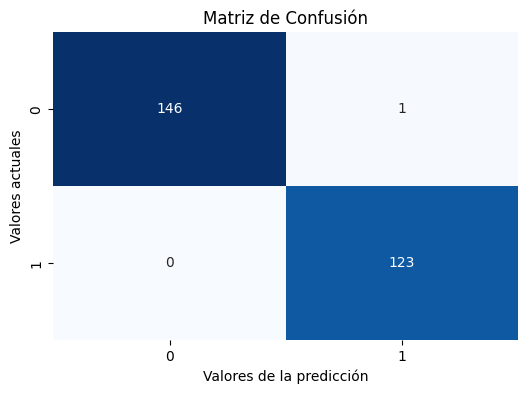

In [113]:
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion, annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

### SVC

In [114]:
#  Exactitud (Accuracy), Tasa de error (Error rate), Precision (Precision), Sensibilidad (Sensitivitty / True positive rate) y Especificidad
# (Especificity) del perceptron

# Exactitud (Accuracy)
y_pred = best_train4[2]

exactitud = accuracy_score(y_test, y_pred)

# Tasa de error (Error rate)
tasa_error = 1 - exactitud

# Matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Precision (Precision)
precision = precision_score(y_test, y_pred)

# Sensibilidad (Sensitivity / True positive rate)
sensibilidad = recall_score(y_test, y_pred)

# Especificidad (Specificity)
especificidad = matriz_confusion[0, 0] / (matriz_confusion[0, 0] + matriz_confusion[0, 1])

# Imprimir las métricas
print("Exactitud (Accuracy): %.2f" % exactitud)
print("Tasa de error (Error rate): %.2f" % tasa_error)
print("Precision (Precision): %.2f" % precision)
print("Sensibilidad (Sensitivity / True positive rate): %.2f" % sensibilidad)
print("Especificidad (Specificity): %.2f" % especificidad)

Exactitud (Accuracy): 0.99
Tasa de error (Error rate): 0.01
Precision (Precision): 0.98
Sensibilidad (Sensitivity / True positive rate): 1.00
Especificidad (Specificity): 0.99


#### Grafica Matriz Confusion

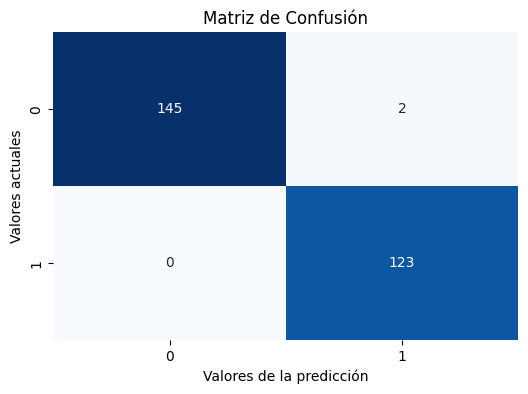

In [115]:
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion, annot = True, cmap = 'Blues', fmt = 'g', cbar = False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()